# 운송 경로 네트워크 시각화

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import networkx as nx

In [2]:
df_tr = pd.read_csv('trans_route.csv', index_col='공장')
df_tr

,F1,F2,F3,F4
공장,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


In [3]:
df_pos = pd.read_csv('trans_route_pos.csv')
df_pos

,W1,W2,W3,F1,F2,F3,F4
0,0,0,0,4.0,4.0,4.0,4.0
1,1,2,3,0.5,1.5,2.5,3.5


## 시각화 구현

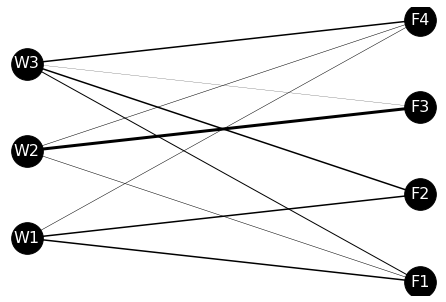

In [6]:
# 객체 생성
G = nx.Graph()

#노드 설정
for i in range(len(df_pos.columns)):
    G.add_node(df_pos.columns[i])

#edgt 설정 및 가중치 르스트
num_pre = 0
edge_weights = []
size = 0.1

for i in range(len(df_pos.columns)):
    for j in range(len(df_pos.columns)):
        if not (i==j):
            #엣지 추가
            G.add_edge(df_pos.columns[i], df_pos.columns[j])
            #엣지 가중치 추가
            if num_pre  < len(G.edges):
                num_pre = len(G.edges)
                weight = 0
                
                if (df_pos.columns[i] in df_tr.columns) and (df_pos.columns[j] in df_tr.index):
                    if df_tr[df_pos.columns[i]][df_pos.columns[j]]:
                        weight = df_tr[df_pos.columns[i]][df_pos.columns[j]]* size
                    
                
                elif (df_pos.columns[j] in df_tr.columns) and (df_pos.columns[i] in df_tr.index):
                    if df_tr[df_pos.columns[j]][df_pos.columns[i]]:
                        weight = df_tr[df_pos.columns[j]][df_pos.columns[i]]*size
                
                edge_weights.append(weight)
    

    

#좌표 설정
pos = {}
for i in range(len(df_pos.columns)):
    node = df_pos.columns[i]
    pos[node] = (df_pos[node][0], df_pos[node][1])


#그리기

nx.draw(G, pos, with_labels=True, font_size=16, node_size=1000, node_color='k', font_color='w', width=edge_weights)

plt.show()
                    